In [ ]:
# Execute isso pra não dar "ModuleNotFoundError" em arquivos da pasta src

import sys
import os

# Adiciona a pasta "src" ao caminho de importação
sys.path.append(os.path.abspath("src"))

In [ ]:
### Teste do Parser ###

from src.parser import carregar_projetos, carregar_alunos

if __name__ == "__main__":
    projetos = carregar_projetos("data/projetodata.txt")
    alunos = carregar_alunos("data/alunodata.txt")

    # Exibe alguns exemplos
    print("Projeto P1:", projetos["P1"]) 
    print("Aluno A1:", alunos["A1"])

In [17]:
from src.parser import carregar_projetos, carregar_alunos
from src.algoritmo_emparelhamento import gale_shapley_aluno_propoe, gale_shapley_projeto_propoe

# Carrega dados
projetos = carregar_projetos("data/projetodata.txt")
alunos = carregar_alunos("data/alunodata.txt")

# Teste: aluno propõe
resultado1 = gale_shapley_aluno_propoe(alunos, projetos)
print("Aluno propõe:", list(resultado1.items())[:5])

# Teste: projeto propõe
resultado2 = gale_shapley_projeto_propoe(alunos, projetos)
print("Projeto propõe:", list(resultado2.items())[:5])

Aluno propõe: [('A1', 'P1'), ('A2', 'P1'), ('A6', 'P40'), ('A7', 'P41'), ('A8', 'P6')]
Projeto propõe: [('A8', 'P6'), ('A127', 'P31'), ('A82', 'P44'), ('A35', 'P48'), ('A1', 'P50')]


In [18]:
from src.iteracoes import executar_10_iteracoes

iteracoes = executar_10_iteracoes(alunos, projetos)

# Exibe um resumo de cada iteração

for i, emp in enumerate(iteracoes, 1):
    print(f"Iteração {i}: {len(emp)} alunos emparelhados")

Iteração 1: 5 alunos emparelhados
Iteração 2: 5 alunos emparelhados
Iteração 3: 5 alunos emparelhados
Iteração 4: 5 alunos emparelhados
Iteração 5: 5 alunos emparelhados
Iteração 6: 5 alunos emparelhados
Iteração 7: 5 alunos emparelhados
Iteração 8: 5 alunos emparelhados
Iteração 9: 5 alunos emparelhados
Iteração 10: 5 alunos emparelhados


c:\Github\Grafos-Projeto-2\src\grafico.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


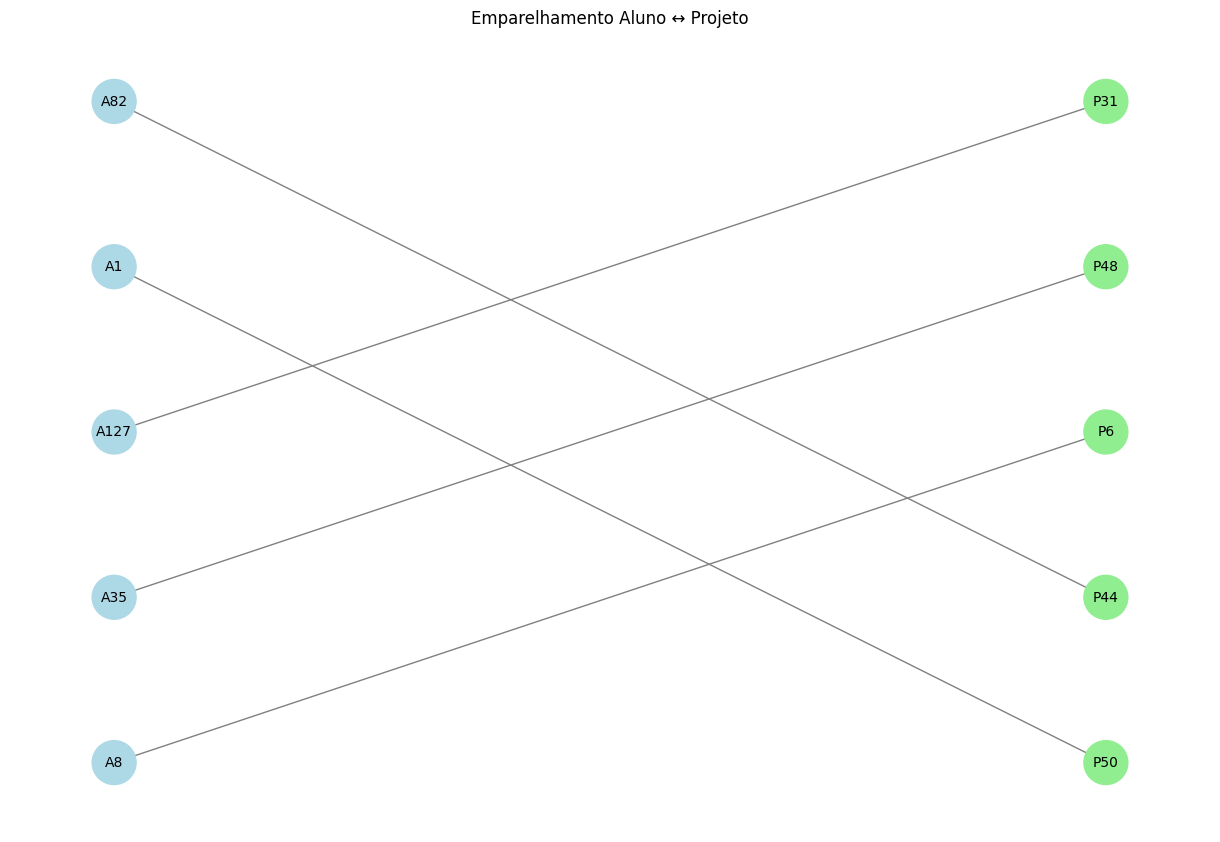

In [19]:
from src.grafico import desenhar_emparelhamento

# Visualizar a primeira iteração
desenhar_emparelhamento(iteracoes[0])